### 👀 Load dataset

In [1]:
import pandas as pd

data = pd.read_csv('clean_data/clean_data.csv')

# move column 'Price' to the end of the dataframe
data = data[['Screen size', 'Screen type', 'Chip', 'RAM', 'ROM', 'Batery', 'OS', 'Screen resolution', 'Mobile network', 'Camera count', 'Camera max MP', 'Price']]

data.head()

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Camera count,Camera max MP,Price
0,6.670000,OLED,snapdragon,8192.0,131072.0,5020.0,android,2592000.0,4.0,5,108.0,5990
1,6.001272,OLED,snapdragon,8192.0,131072.0,3300.0,android,2851200.0,5.0,2,12.0,20990
2,6.100000,OLED,snapdragon,8192.0,131072.0,3700.0,android,2527200.0,5.0,4,50.0,16990
3,6.100000,OLED,snapdragon,8192.0,262144.0,3700.0,android,2527200.0,5.0,4,50.0,18490
4,6.600000,OLED,snapdragon,8192.0,262144.0,4500.0,android,2527200.0,5.0,4,50.0,20990


### 🎨 Convert categorical features to numeric type

In [2]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data

label_encoder(data, 'Screen type')
label_encoder(data, 'Chip')
label_encoder(data, 'OS')

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Camera count,Camera max MP,Price
0,6.670000,1,3,8192.000000,131072.0,5020.0,0,2592000.0,4.0,5,108.0,5990
1,6.001272,1,3,8192.000000,131072.0,3300.0,0,2851200.0,5.0,2,12.0,20990
2,6.100000,1,3,8192.000000,131072.0,3700.0,0,2527200.0,5.0,4,50.0,16990
3,6.100000,1,3,8192.000000,262144.0,3700.0,0,2527200.0,5.0,4,50.0,18490
4,6.600000,1,3,8192.000000,262144.0,4500.0,0,2527200.0,5.0,4,50.0,20990
...,...,...,...,...,...,...,...,...,...,...,...,...
893,6.530000,0,2,2048.000000,32768.0,5000.0,0,1120000.0,4.0,2,13.0,2090
894,6.530000,0,2,3072.000000,65536.0,5000.0,0,1152000.0,4.0,4,13.0,2640
895,6.530000,0,2,4096.000000,131072.0,5000.0,0,1152000.0,4.0,4,13.0,2890
896,2.400000,0,0,5681.197279,4096.0,1900.0,1,76800.0,4.0,1,3.0,890


### ✂️ Split Train-Test dataset

In [3]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.3, random_state=1)

### 🔍 Check out data distribution of data_train

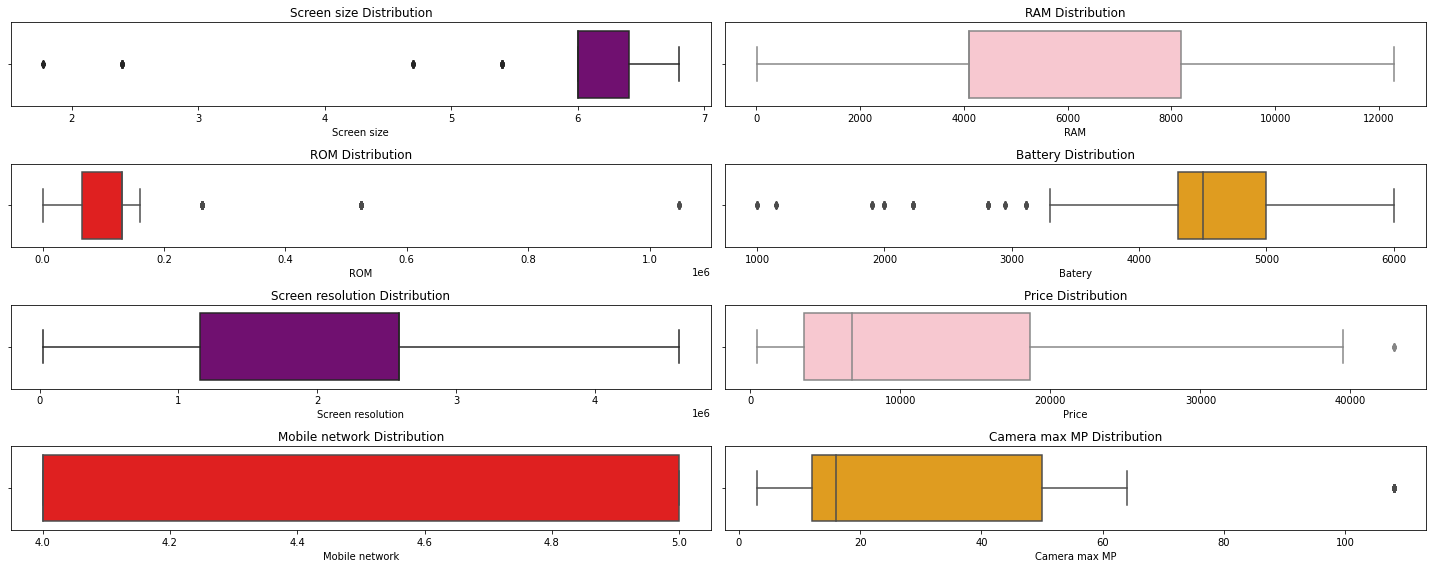

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 2, figsize=(20,8))

ax1 = plt.subplot(421)
ax1 = sns.boxplot(data=data_train, x='Screen size', color='purple')
ax1.set_title("Screen size Distribution")

ax2 = plt.subplot(422)
ax2 = sns.boxplot(data=data_train, x='RAM', color='pink')
ax2.set_title("RAM Distribution")

ax3 = plt.subplot(423)
ax3 = sns.boxplot(data=data_train, x='ROM', color='red')
ax3.set_title("ROM Distribution")

ax4 = plt.subplot(424)
ax4 = sns.boxplot(data=data_train, x='Batery', color='orange')
ax4.set_title("Battery Distribution")

ax5 = plt.subplot(425)
ax5 = sns.boxplot(data=data_train, x='Screen resolution', color='purple')
ax5.set_title("Screen resolution Distribution")

ax6 = plt.subplot(426)
ax6 = sns.boxplot(data=data_train, x='Price', color='pink')
ax6.set_title("Price Distribution")

ax7 = plt.subplot(427)
ax7 = sns.boxplot(data=data_train, x='Mobile network', color='red')
ax7.set_title("Mobile network Distribution")

ax8 = plt.subplot(428)
ax8 = sns.boxplot(data=data_train, x='Camera max MP', color='orange')
ax8.set_title("Camera max MP Distribution")

plt.tight_layout()

'Screen size', 'ROM', 'Battery', 'Price', 'Camera' have outliers

Text(0.5, 1.0, 'Camera max MP Distribution')

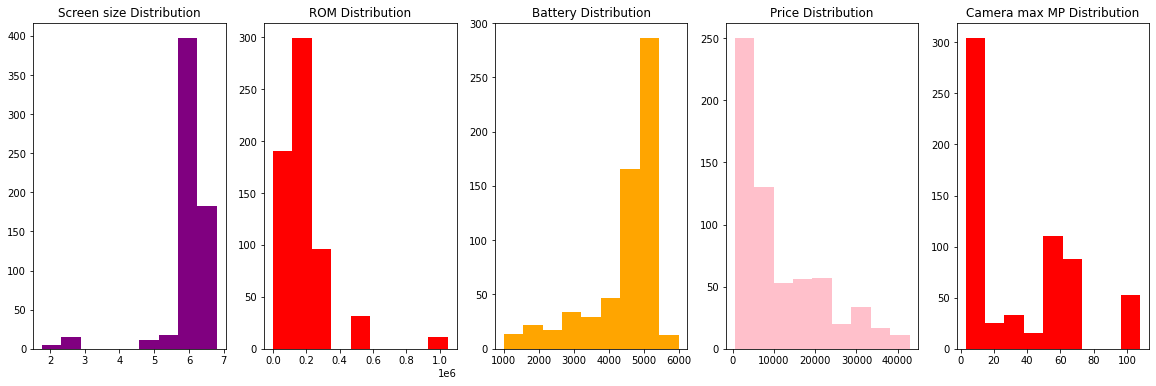

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(20,6))
(ax1, ax2, ax3, ax4, ax5) = ax

ax1.hist(data_train['Screen size'], bins=9, color='purple')
ax1.set_title("Screen size Distribution")

ax2.hist(data_train['ROM'], bins=9, color='red')
ax2.set_title("ROM Distribution")

ax3.hist(data_train['Batery'], bins=9, color='orange')
ax3.set_title("Battery Distribution")

ax4.hist(data_train['Price'], bins=9, color='pink')
ax4.set_title("Price Distribution")

ax5.hist(data_train['Camera max MP'], bins=9, color='red')
ax5.set_title("Camera max MP Distribution")

'Screen size', 'ROM', 'Battery', 'Price', 'Camera' have **skewed** distribution, use **IQR** to find the upper and lower bounds

### 🧹 Outlier processing using IQR

In [6]:
import numpy as np

def outliers_iqr(column):
  q1, q3 = np.percentile(data_train[column], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  data_train[column] = data_train[column].clip(lower_bound, upper_bound)

  return data_train[column]

data_train['Screen size'] = outliers_iqr('Screen size')
data_train['ROM'] = outliers_iqr('ROM')
data_train['Batery'] = outliers_iqr('Batery')
data_train['Price'] = outliers_iqr('Price')
data_train['Camera max MP'] = outliers_iqr('Camera max MP')

### 📊 Data distribution with outlier processing

Text(0.5, 1.0, 'Camera max MP Distribution')

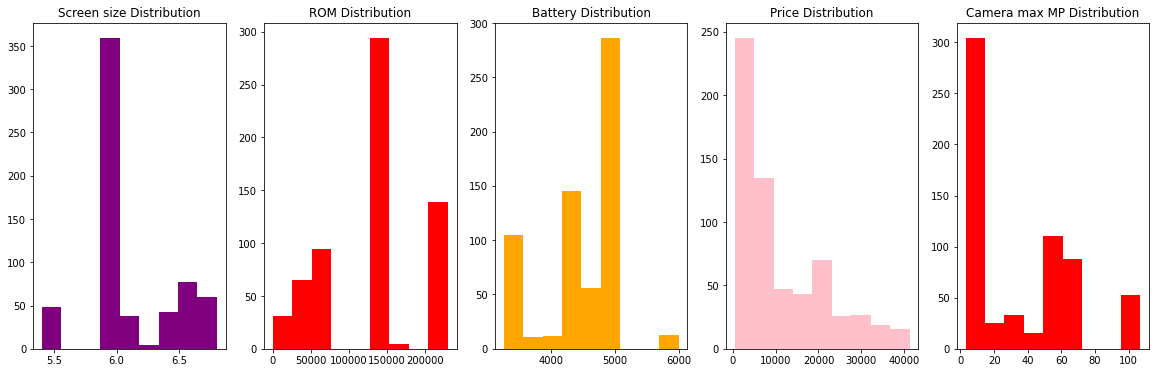

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(20,6))
(ax1, ax2, ax3, ax4, ax5) = ax

ax1.hist(data_train['Screen size'], bins=9, color='purple')
ax1.set_title("Screen size Distribution")

ax2.hist(data_train['ROM'], bins=9, color='red')
ax2.set_title("ROM Distribution")

ax3.hist(data_train['Batery'], bins=9, color='orange')
ax3.set_title("Battery Distribution")

ax4.hist(data_train['Price'], bins=9, color='pink')
ax4.set_title("Price Distribution")

ax5.hist(data_train['Camera max MP'], bins=9, color='red')
ax5.set_title("Camera max MP Distribution")

### 🔨 Normalize the data with z-score

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vars_normalizing = ['Screen size', 'RAM', 'ROM', 'Batery', 'Price', 'Mobile network', 'Camera max MP']

data_train[vars_normalizing] = scaler.fit_transform(data_train[vars_normalizing])
data_test[vars_normalizing] = scaler.transform(data_test[vars_normalizing])

### ✂️ Separate dataset into features and target

In [9]:
X_train = data_train.drop('Price', axis=1)
y_train = data_train['Price']

X_test = data_test.drop('Price', axis=1)
y_test = data_test['Price']

### 👀 Select feature based on heatmap

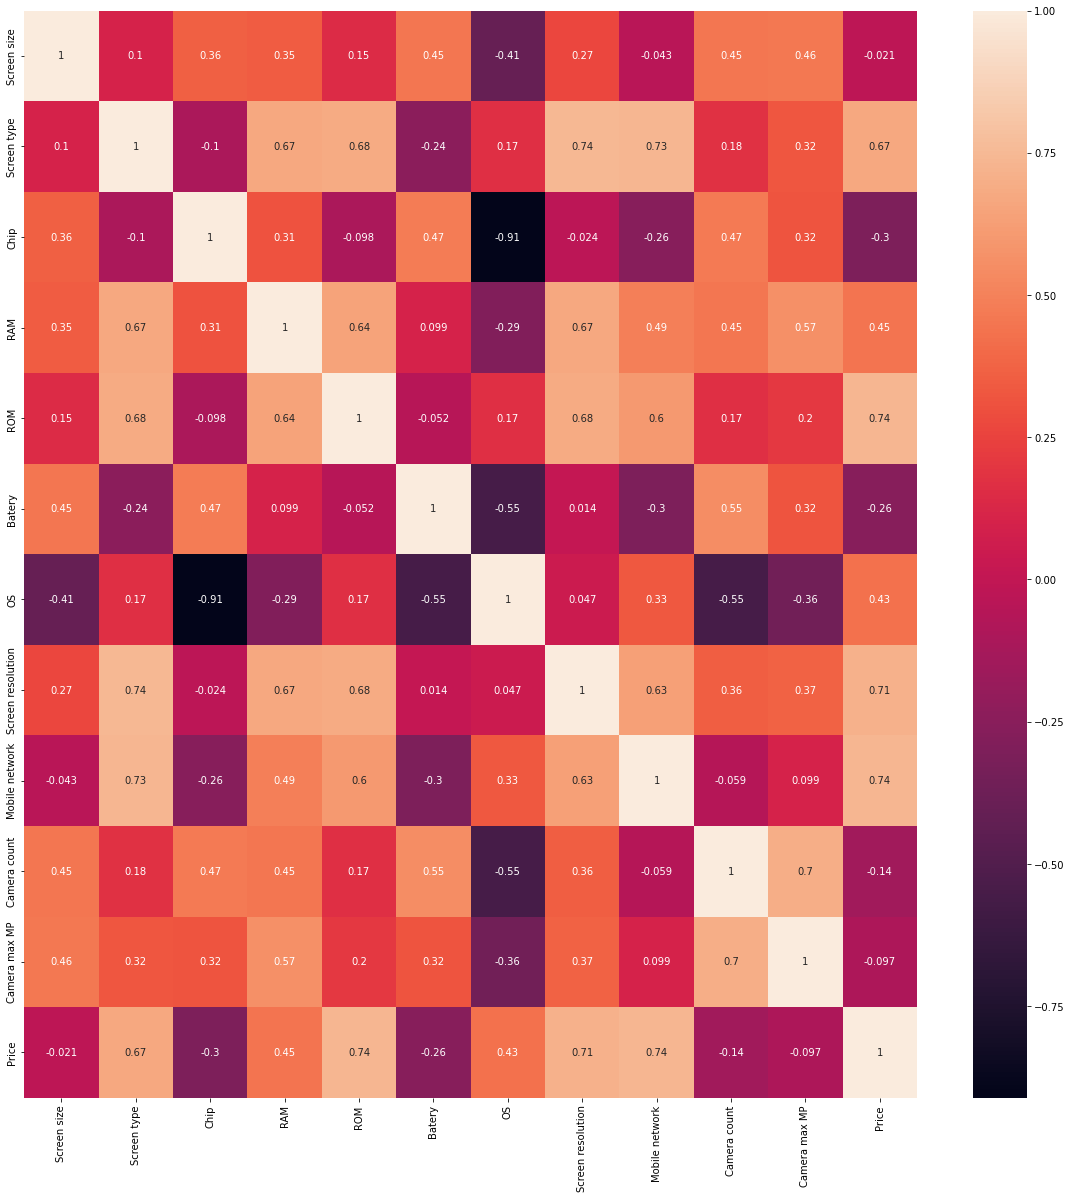

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(data):
    # get correlation matrix
    corr = data.corr()
    plt.figure(figsize=(20, 20))

    # plot heatmap
    sns.heatmap(corr, annot=True)
    plt.show()

plot_heatmap(data_train)

### 📝 Export data to csv

In [11]:
data_train.to_csv('train_test_data/train_data.csv', index=False)
data_test.to_csv('train_test_data/test_data.csv', index=False)